<a href="https://colab.research.google.com/github/talhaghaffarr/Car-pricing-model/blob/main/German_EV_Car_Pricing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [80]:
sheet_name = 'Cheapestelectriccars-EVDatabase2023'
sheet_id = '1TxZOBqOqgTOismM4ZSVm-PbuEgmQpvhOVIQr_3ktAi4'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
data= pd.read_csv(url)

data.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN


In [81]:
sheet_name = 'global_inflation_data'
sheet_id = '1nuL6SJBijh2OcYlxEcwnXTQeUQd2ODNyg3eXFswBXvU'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

data2 = pd.read_csv(url)

data2.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


# Feature Engineering


In [82]:
# Filtering Germany only data
germany_data = data2[data2["country_name"] == "Germany"]

years = [str(year) for year in range(2019, 2025)]
germany_data = germany_data[["country_name"] + years]
germany_data.reset_index(drop=True, inplace=True)
print(germany_data)


  country_name  2019  2020  2021  2022  2023  2024
0      Germany   1.4   0.4   3.2   8.7   6.3   3.5


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             309 non-null    object
 1   Subtitle         309 non-null    object
 2   Acceleration     309 non-null    object
 3   TopSpeed         309 non-null    object
 4   Range            309 non-null    object
 5   Efficiency       309 non-null    object
 6   FastChargeSpeed  306 non-null    object
 7   Drive            309 non-null    object
 8   NumberofSeats    309 non-null    int64 
 9   PriceinGermany   282 non-null    object
 10  PriceinUK        198 non-null    object
dtypes: int64(1), object(10)
memory usage: 26.7+ KB


In [84]:
data = data.drop(['PriceinUK'], axis=1)

In [85]:
data.dropna(inplace=True)

In [86]:
# Convert columns to strings before applying str.replace
data['Acceleration'] = data['Acceleration'].astype(str).str.replace(' sec', '').astype(float)
data['TopSpeed'] = data['TopSpeed'].astype(str).str.replace(' km/h', '').astype(float)
data['Range'] = data['Range'].astype(str).str.replace(' km', '').astype(str).str.replace(',', '').astype(float)
data['Efficiency'] = data['Efficiency'].astype(str).str.replace(' Wh/km', '').astype(float)
data['FastChargeSpeed'] = data['FastChargeSpeed'].astype(str).str.replace('km/h', '').astype(float)
data['PriceinGermany'] = data['PriceinGermany'].astype(str).str.replace('€', '', regex=False).str.replace(',', '', regex=False).astype(float)
# data['PriceinUK'] = data['PriceinUK'].astype(str).str.replace('£', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [88]:

pattern = r'(\d+\.?\d*)\s*kWh.*(Available since|Expected from)\s([A-Za-z]+\s\d{4})'
kwh_values = []
available_dates = []

for line in data['Subtitle']:
    match = re.search(pattern, line)
    if match:
        kwh_values.append(float(match.group(1)))
        available_dates.append(match.group(3))

data['Battery'] = kwh_values
data['Availability'] = available_dates
data['Availability'] = pd.to_datetime(data['Availability'], format='%B %Y', errors='coerce')
data['month'] = data['Availability'].dt.month
data['year'] = data['Availability'].dt.year
data = data.drop('Availability', axis=1)

# print("Extracted kWh values:", kwh_values)
# print("Extracted Available dates:", available_dates)
# print("\nUpdated DataFrame:")
data.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,Battery,month,year
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7,270.0,645.0,183.0,820.0,All Wheel Drive,5,218000.0,118.0,1,2022
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8,260.0,400.0,209.0,980.0,All Wheel Drive,4,189668.0,83.7,1,2020
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3,250.0,405.0,210.0,1000.0,All Wheel Drive,4,146050.0,85.0,3,2021
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4,135.0,315.0,165.0,230.0,Front Wheel Drive,5,36840.0,52.0,11,2019
5,Tesla Model Y Performance,75 kWh useable battery Available sinc...,3.7,250.0,415.0,181.0,640.0,All Wheel Drive,5,63667.0,75.0,3,2022


In [89]:
germany_inflation_long = germany_data.melt(id_vars=["country_name"], var_name="year", value_name="Inflation Rate")
germany_inflation_long["year"] = germany_inflation_long["year"].astype(int)
data = data.merge(germany_inflation_long, on="year", how="left")
data.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,Battery,month,year,country_name,Inflation Rate
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7,270.0,645.0,183.0,820.0,All Wheel Drive,5,218000.0,118.0,1,2022,Germany,8.7
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8,260.0,400.0,209.0,980.0,All Wheel Drive,4,189668.0,83.7,1,2020,Germany,0.4
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3,250.0,405.0,210.0,1000.0,All Wheel Drive,4,146050.0,85.0,3,2021,Germany,3.2
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4,135.0,315.0,165.0,230.0,Front Wheel Drive,5,36840.0,52.0,11,2019,Germany,1.4
4,Tesla Model Y Performance,75 kWh useable battery Available sinc...,3.7,250.0,415.0,181.0,640.0,All Wheel Drive,5,63667.0,75.0,3,2022,Germany,8.7


In [90]:
from datetime import datetime

current_year = datetime.now().year
data['age'] = current_year - data['year']

data.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,Battery,month,year,country_name,Inflation Rate,age
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7,270.0,645.0,183.0,820.0,All Wheel Drive,5,218000.0,118.0,1,2022,Germany,8.7,3
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8,260.0,400.0,209.0,980.0,All Wheel Drive,4,189668.0,83.7,1,2020,Germany,0.4,5
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3,250.0,405.0,210.0,1000.0,All Wheel Drive,4,146050.0,85.0,3,2021,Germany,3.2,4
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4,135.0,315.0,165.0,230.0,Front Wheel Drive,5,36840.0,52.0,11,2019,Germany,1.4,6
4,Tesla Model Y Performance,75 kWh useable battery Available sinc...,3.7,250.0,415.0,181.0,640.0,All Wheel Drive,5,63667.0,75.0,3,2022,Germany,8.7,3


# Data Analysis

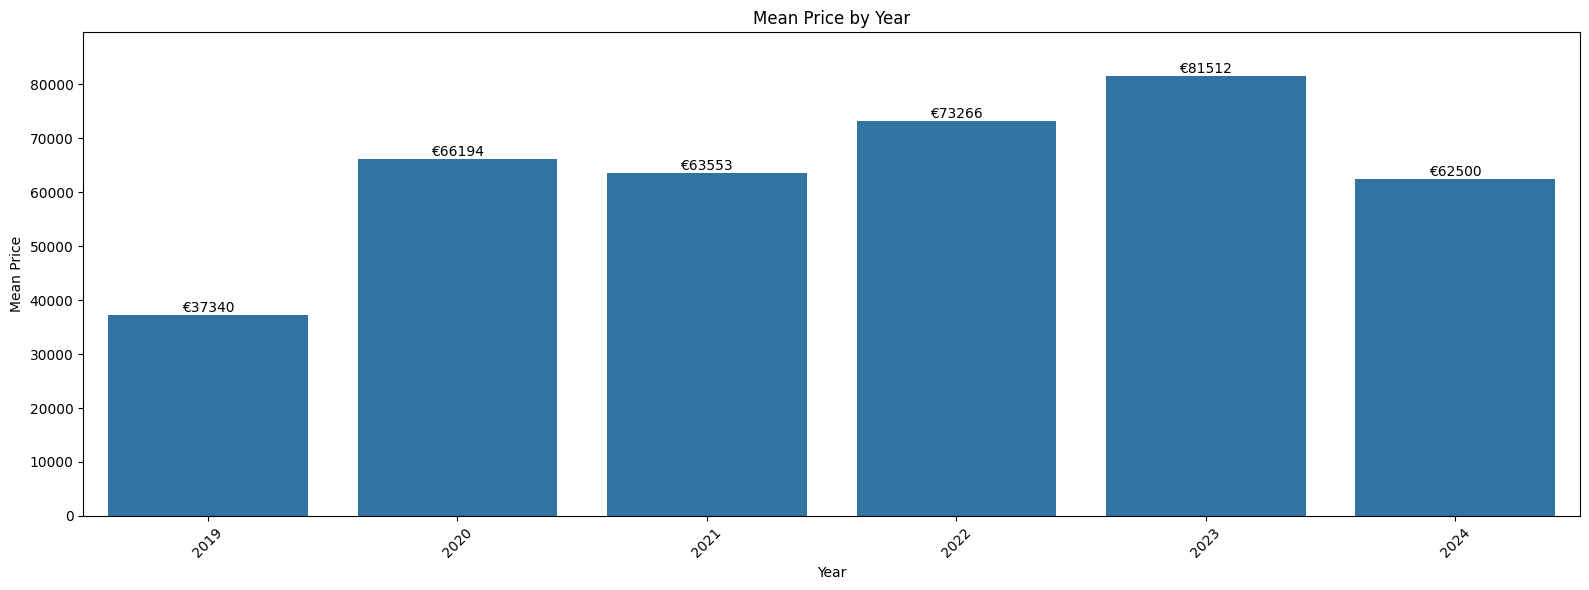

In [91]:
# Calculate mean price amounts by year
mean_price_by_year = data.groupby('year')['PriceinGermany'].mean().reset_index()

plt.figure(figsize=(16, 6))
sns.barplot(x='year', y='PriceinGermany', data=mean_price_by_year,
            order=mean_price_by_year['year'])

plt.title('Mean Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)

# Add value labels directly above each bar
for i, v in enumerate(mean_price_by_year['PriceinGermany']):
    plt.text(i, v, f'€{v:.0f}', ha='center', va='bottom')

# Adjust y-axis limit to accommodate labels
plt.ylim(0, max(mean_price_by_year['PriceinGermany']) * 1.1)

plt.tight_layout()
plt.show()

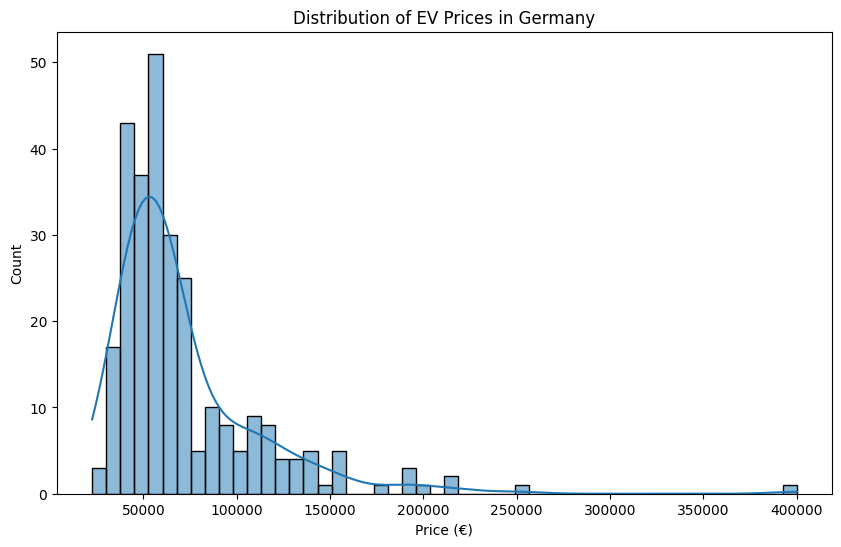

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(data['PriceinGermany'], kde=True, bins=50)
plt.title('Distribution of EV Prices in Germany')
plt.xlabel('Price (€)')
plt.ylabel('Count')
plt.show()

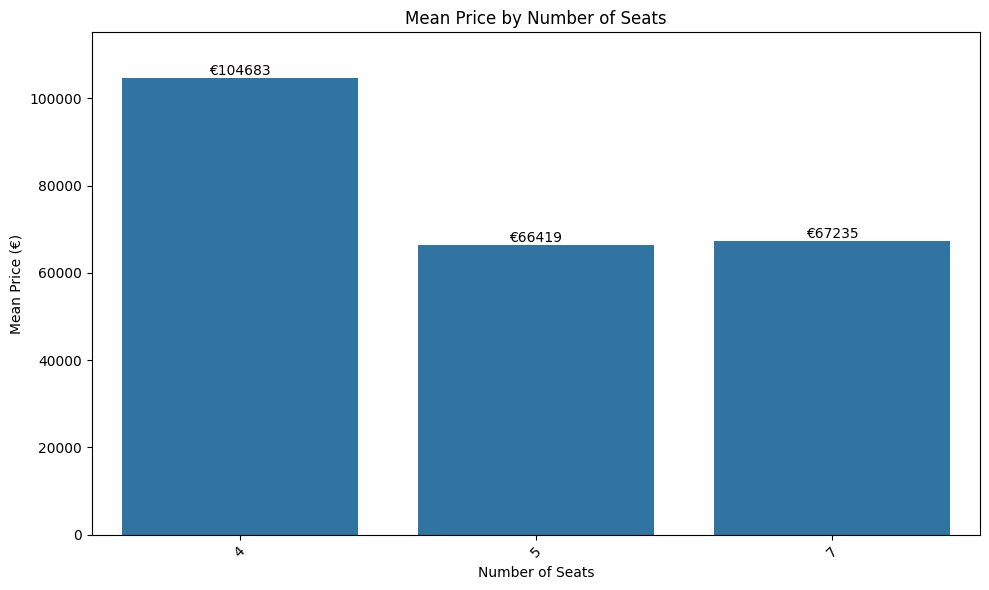

In [202]:
# Calculate mean price by number of seats
mean_price_by_seats = data.groupby('NumberofSeats')['PriceinGermany'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='NumberofSeats', y='PriceinGermany',
            data=mean_price_by_seats,
            order=mean_price_by_seats['NumberofSeats'])

plt.title('Mean Price by Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Mean Price (€)')
plt.xticks(rotation=45)

# Add value labels above each bar
for i, v in enumerate(mean_price_by_seats['PriceinGermany']):
    plt.text(i, v, f'€{v:.0f}', ha='center', va='bottom')

# Adjust y-axis to fit labels
plt.ylim(0, max(mean_price_by_seats['PriceinGermany']) * 1.1)

plt.tight_layout()
plt.show()

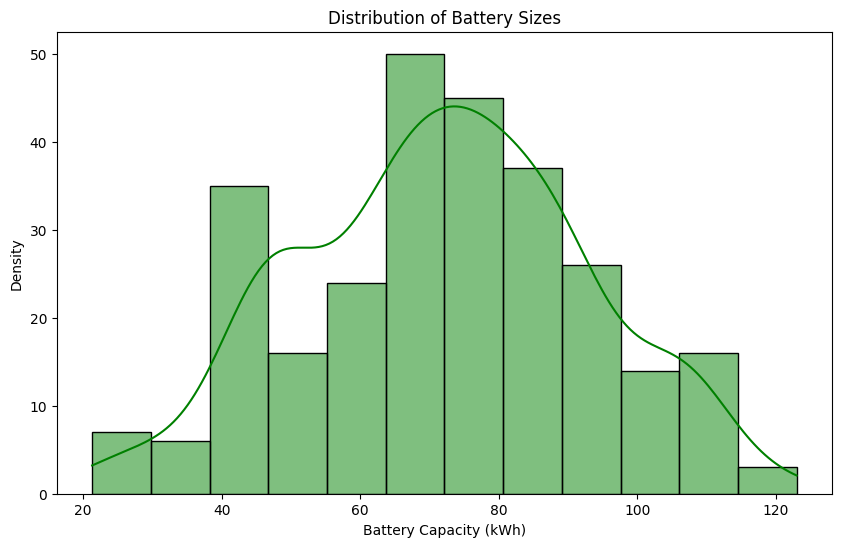

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Battery', kde=True, color='green')
plt.title('Distribution of Battery Sizes')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Density')
plt.show()

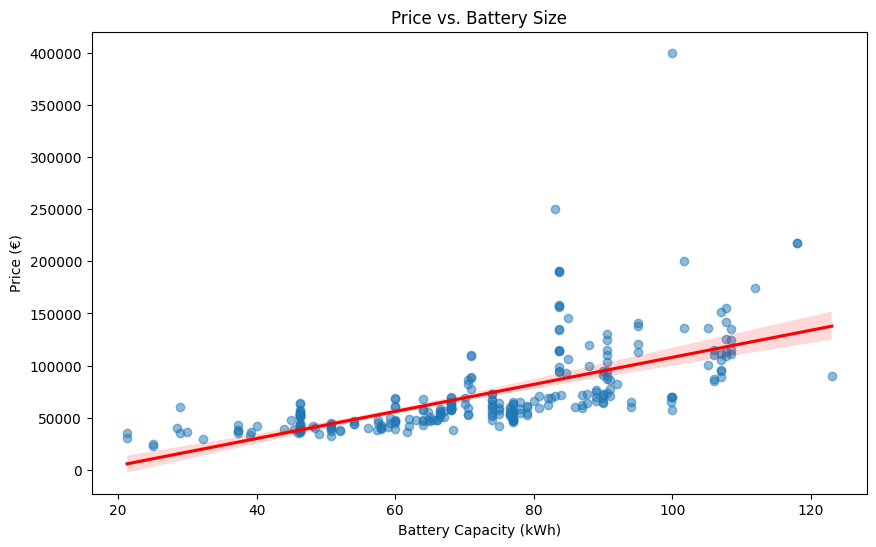

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(data, x='Battery', y='PriceinGermany',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Price vs. Battery Size')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Price (€)')
plt.show()

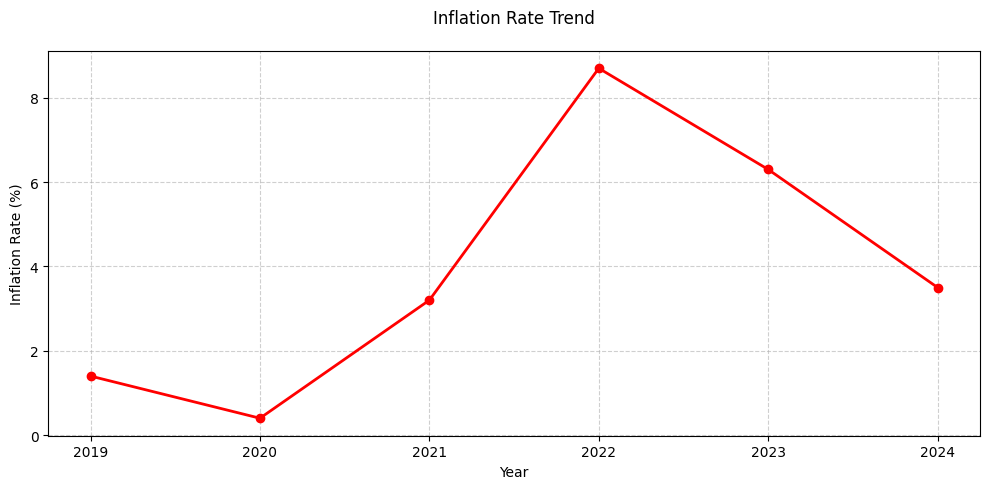

In [19]:
plt.figure(figsize=(10, 5))
data.groupby('year')['Inflation Rate'].mean().plot(
    marker='o',
    color='red',
    linewidth=2
)
plt.title('Inflation Rate Trend', pad=20)
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

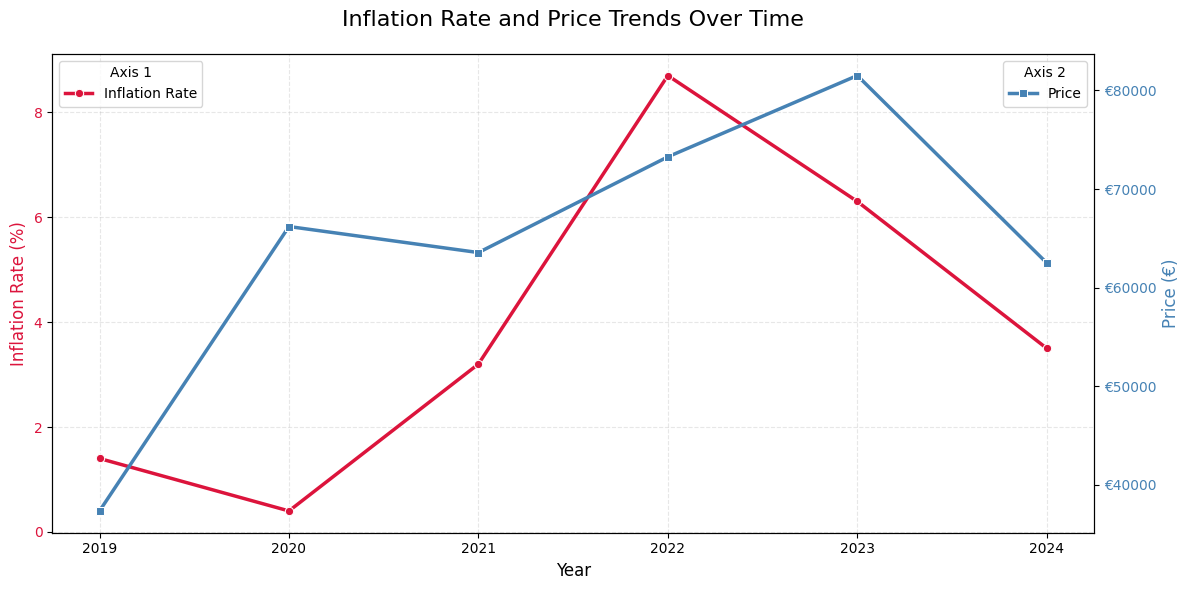

In [95]:
yearly_data = data.groupby('year').agg({
    'Inflation Rate': 'mean',
    'PriceinGermany': 'mean'
}).reset_index()


fig, ax1 = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(right=0.85)

# Ploting Inflation Rate (left axis)
color = 'crimson'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Inflation Rate (%)', color=color, fontsize=12)
sns.lineplot(x='year', y='Inflation Rate', data=yearly_data,
             ax=ax1, color=color, marker='o', markersize=6, linewidth=2.5, label='Inflation Rate')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'steelblue'
ax2.set_ylabel('Price (€)', color=color, fontsize=12)
sns.lineplot(x='year', y='PriceinGermany', data=yearly_data,
             ax=ax2, color=color, marker='s', markersize=6, linewidth=2.5, label='Price')
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter('€{x:.0f}')

plt.title('Inflation Rate and Price Trends Over Time', fontsize=16, pad=20)
ax1.grid(True, linestyle='--', alpha=0.3)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

legend1 = ax1.legend(lines1, labels1, loc='upper left', bbox_to_anchor=(0, 1), fontsize=10, title='Axis 1')
legend2 = ax2.legend(lines2, labels2, loc='upper right', bbox_to_anchor=(1, 1), fontsize=10, title='Axis 2')
plt.xticks(yearly_data['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

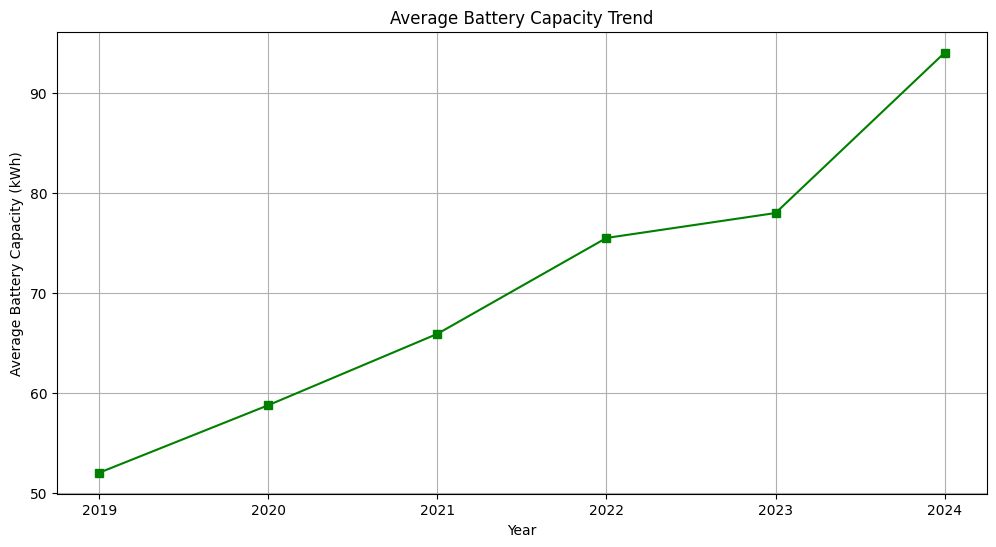

In [96]:
plt.figure(figsize=(12, 6))
data.groupby('year')['Battery'].mean().plot(marker='s', color='green')
plt.title('Average Battery Capacity Trend')
plt.xlabel('Year')
plt.ylabel('Average Battery Capacity (kWh)')
plt.grid(True)
plt.show()

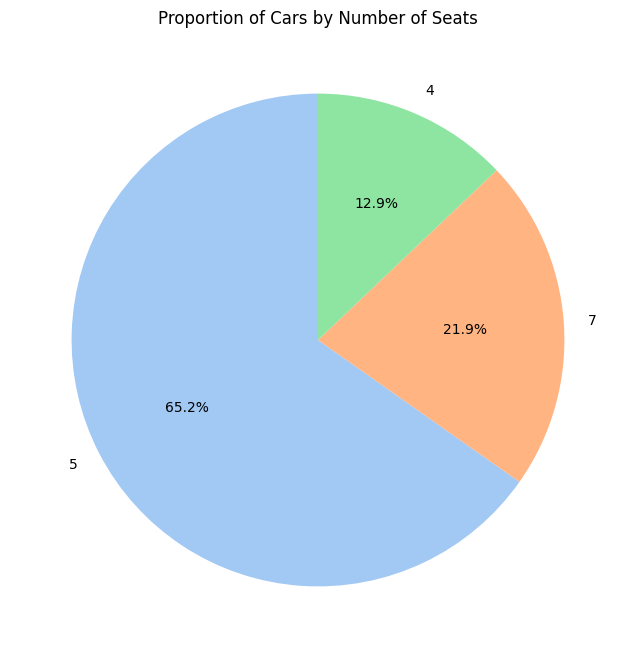

In [97]:
seat_counts = data['NumberofSeats'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(seat_counts, labels=seat_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Cars by Number of Seats')
plt.show()

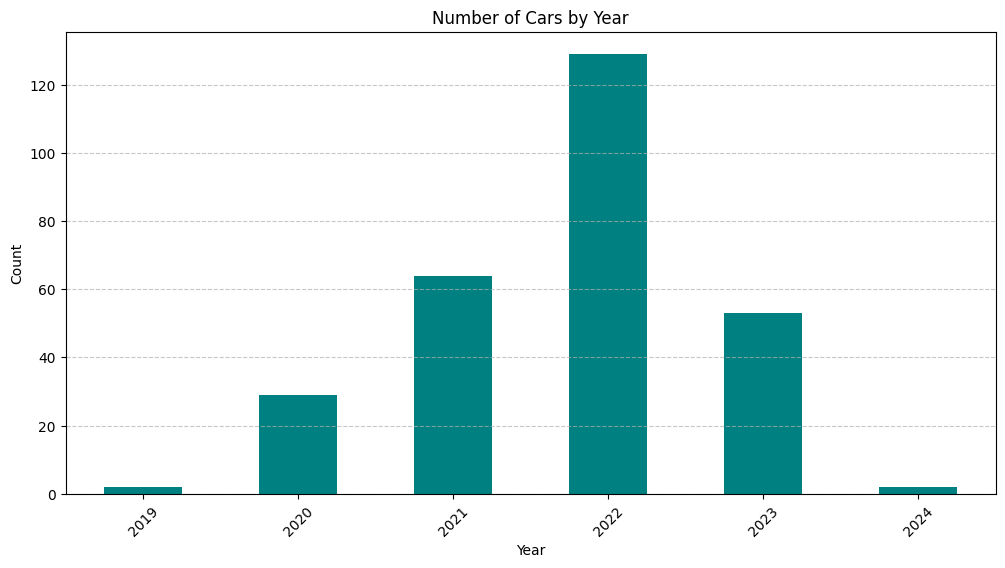

In [98]:
plt.figure(figsize=(12, 6))
data['year'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

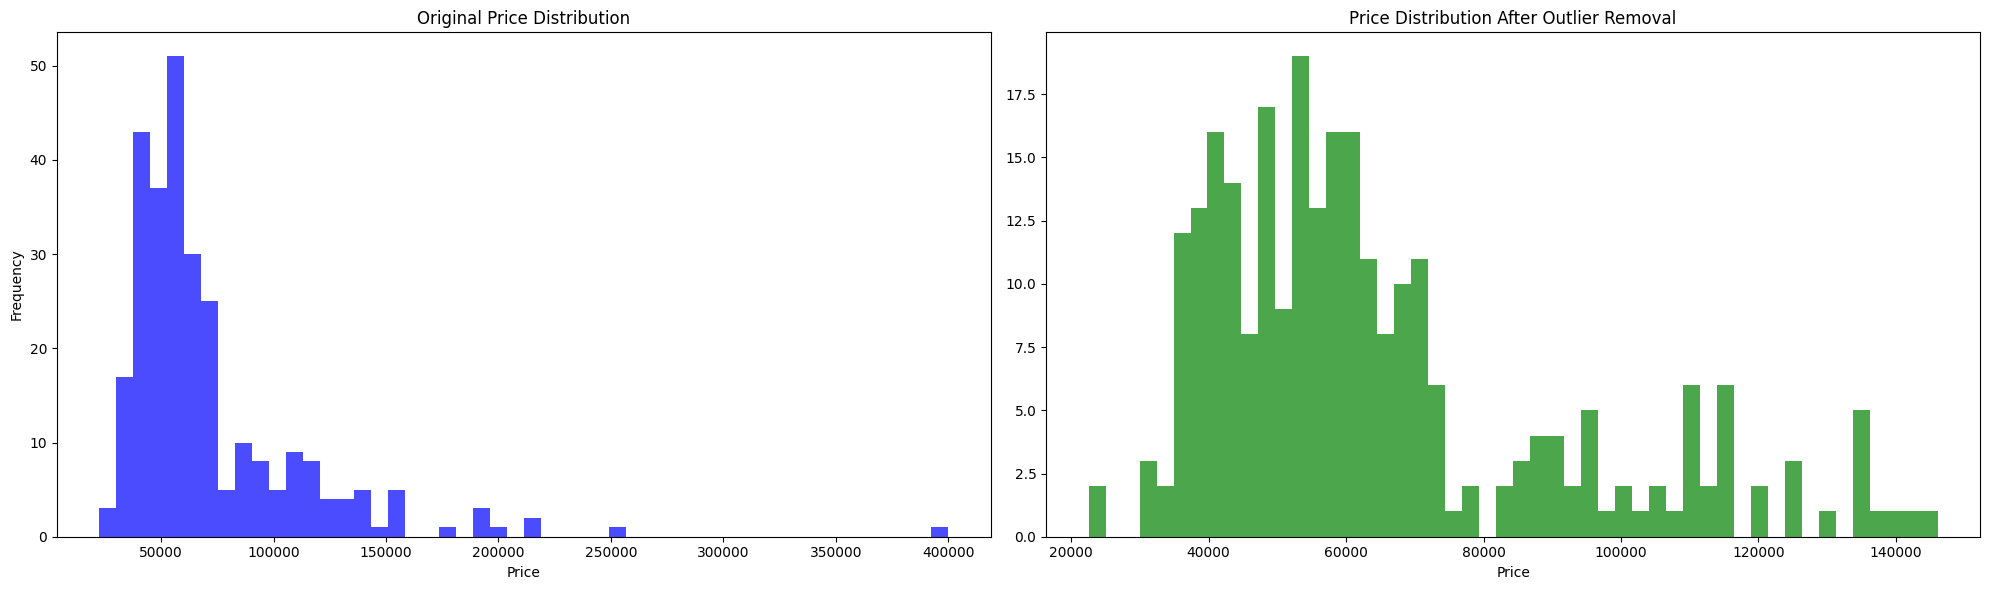

In [101]:

plt.figure(figsize=(20, 6))

# Original price distribution
plt.subplot(1, 2, 1)
plt.hist(data['PriceinGermany'], bins=50, color='blue', alpha=0.7)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Calculate and apply 95th percentile threshold
price_threshold = data['PriceinGermany'].quantile(0.95)
data = data[data['PriceinGermany'] <= price_threshold]

# Cleaned distribution
plt.subplot(1, 2, 2)
plt.hist(data['PriceinGermany'], bins=50, color='green', alpha=0.7)
plt.title('Price Distribution After Outlier Removal')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

<ipython-input-102-a61dbc5be871>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PriceinGermany', y='Name', data=cheapest_evs, palette='viridis')


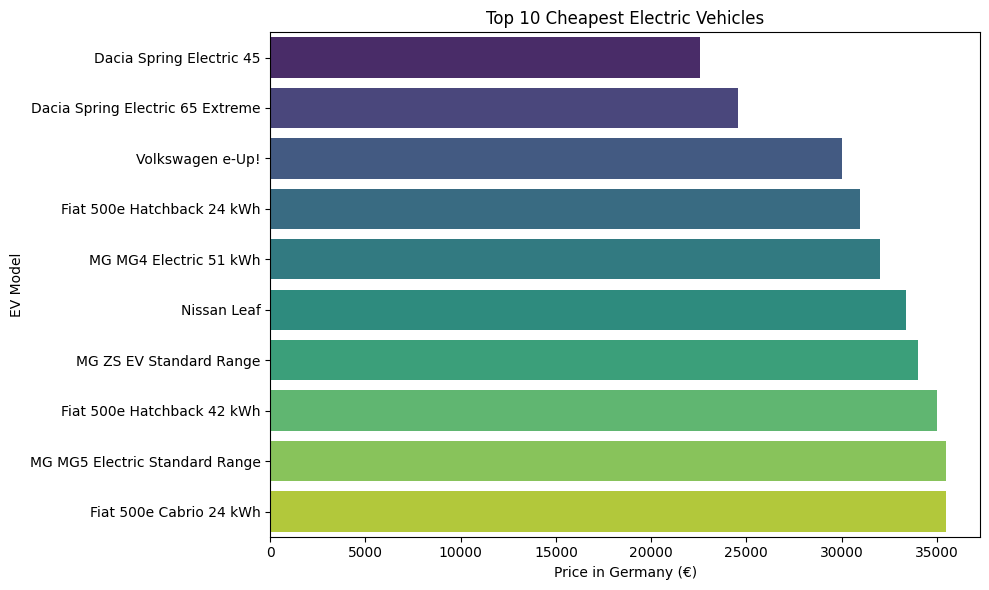

In [102]:

# Sort the DataFrame by 'PriceinGermany' in ascending order and select the top 10
cheapest_evs = data.sort_values(by='PriceinGermany').head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PriceinGermany', y='Name', data=cheapest_evs, palette='viridis')

# Add labels and title
plt.xlabel('Price in Germany (€)')
plt.ylabel('EV Model')
plt.title('Top 10 Cheapest Electric Vehicles')
plt.tight_layout()

# Show the plot
plt.show()

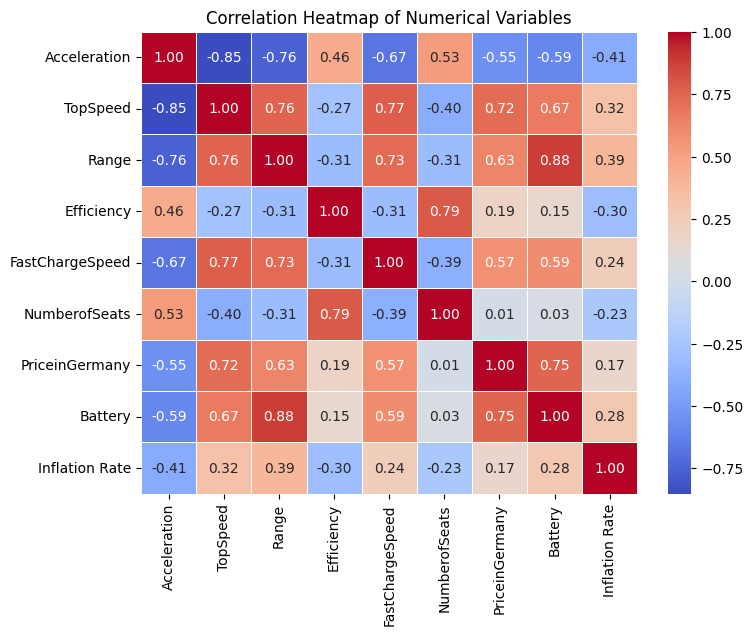

In [103]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [104]:
summary_stats = data.describe()
summary_stats

,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,Battery,month,year,Inflation Rate,age
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,7.632075,177.977358,360.452830,199.143396,531.849057,5.354717,64712.392453,70.686038,7.139623,2021.735849,6.038491,3.264151
std,3.047513,35.347724,105.226049,33.396411,238.322690,0.950790,26339.318968,20.091356,3.682387,0.924231,2.948746,0.924231
min,2.100000,125.000000,135.000000,150.000000,150.000000,4.000000,22550.000000,21.300000,1.000000,2019.000000,0.400000,1.000000
25%,5.100000,150.000000,275.000000,173.000000,330.000000,5.000000,46950.000000,57.500000,4.000000,2021.000000,3.200000,3.000000
50%,7.300000,180.000000,370.000000,192.000000,500.000000,5.000000,57900.000000,70.500000,7.000000,2022.000000,6.300000,3.000000
75%,9.000000,200.000000,435.000000,214.000000,650.000000,5.000000,71490.000000,84.700000,11.000000,2022.000000,8.700000,4.000000
max,19.100000,282.000000,640.000000,295.000000,1240.000000,7.000000,146050.000000,123.000000,12.000000,2024.000000,8.700000,6.000000


{'Mean Absolute Error (MAE)': 7021.041097324484, 'Mean Squared Error (MSE)': 90287035.82222295, 'R² Score': 0.8249878232298586, 'Adjusted R² Score': 0.7876901462132712}


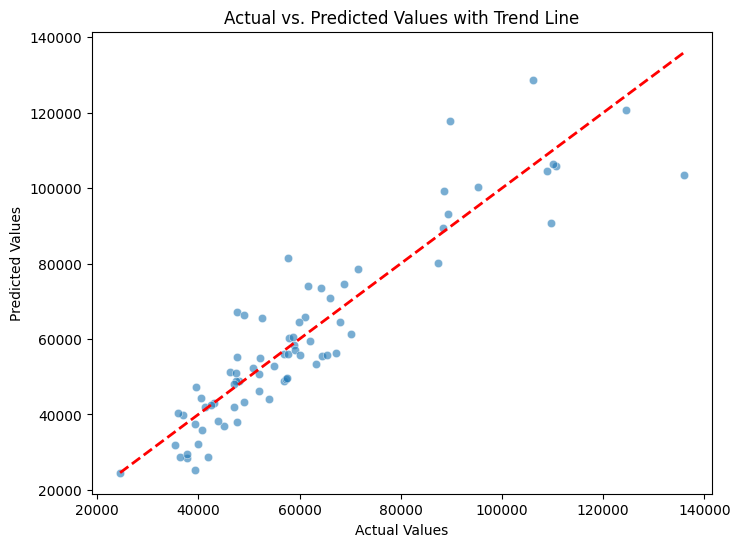

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


categorical_features = ["Name","Drive","NumberofSeats","Subtitle"]
numerical_features = ["Acceleration", "TopSpeed","Range", "FastChargeSpeed",  "Battery","Inflation Rate","year","age","month"]
target = "PriceinGermany"

ml_data = data[categorical_features + numerical_features + [target]].dropna()

X = ml_data[categorical_features + numerical_features]
y = ml_data[target]

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Displaying results
model_results_updated = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R² Score": r2,
    "Adjusted R² Score": adjusted_r2
}

print(model_results_updated)

# Scatterplot with trend line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Trend Line")
plt.show()

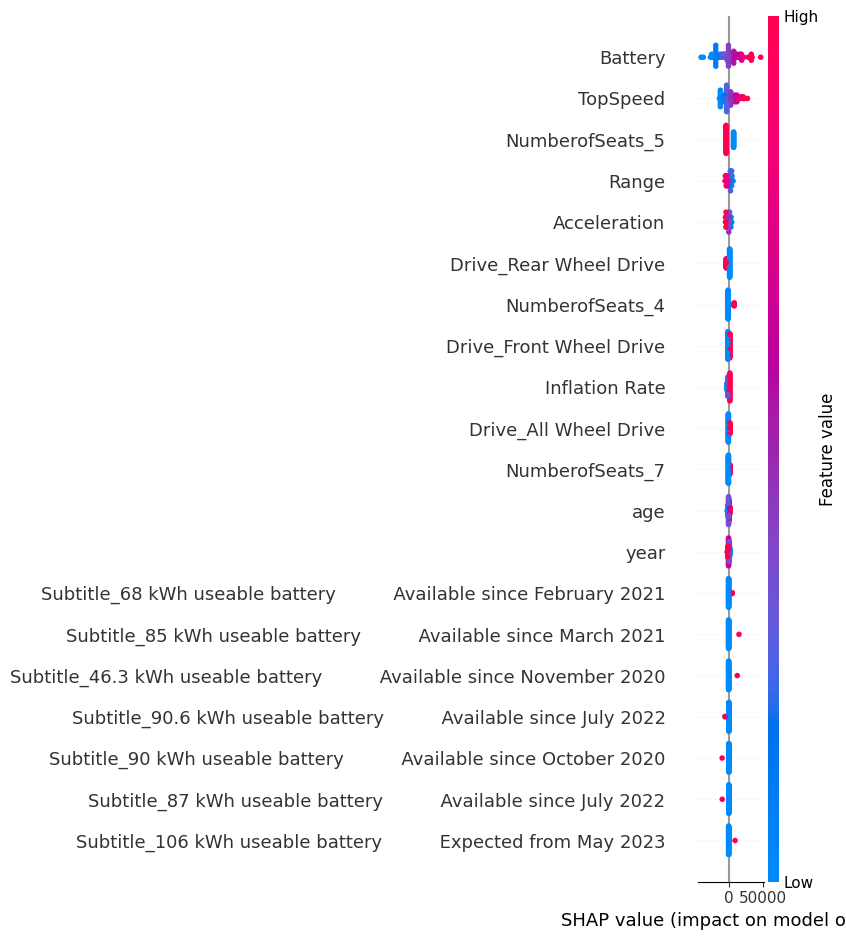

In [110]:
import shap

# SHAP Analysis
X_test_processed = model_pipeline.named_steps["preprocessor"].transform(X_test)
X_test_processed_dense = X_test_processed.toarray()
explainer = shap.LinearExplainer(model_pipeline.named_steps["regressor"], X_test_processed_dense)
shap_values = explainer.shap_values(X_test_processed_dense)
# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test_processed_dense, feature_names=numerical_features + list(model_pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)))

In [162]:
# print(X_test)

In [114]:
from sklearn.svm import SVR  # Import SVR




model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", SVR(kernel='linear', C=1000, epsilon=0.5))  # Set optimized hyperparameters
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

model_results_updated = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R² Score": r2,
    "Adjusted R² Score": adjusted_r2
}

model_results_updated


{'Mean Absolute Error (MAE)': 7003.603829468994,
 'Mean Squared Error (MSE)': 97392518.72148201,
 'R² Score': 0.8112145719775867,
 'Adjusted R² Score': 0.7709816119072364}

In [115]:
print("train_samples", X_train.shape[0])
print("test_samples", X_test.shape[0])

train_samples 190
test_samples 75


In [116]:
# Calculate residuals (errors)
residuals = y_test - y_pred

In [118]:
# plt.figure(figsize=(10, 6))
# sns.histplot(residuals, kde=True, color='blue', bins=30)
# plt.axvline(x=0, color='red', linestyle='--', label='Zero Error Line')
# plt.title('Error Distribution for SVR Model (Training Set)')
# plt.xlabel('Residuals (Actual - Predicted)')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

In [119]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("poly_features", PolynomialFeatures(degree=2)),
    ("regressor", LinearRegression())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Poynomial Model Results:")

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

model_results_updated = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R² Score": r2,
    "Adjusted R² Score": adjusted_r2
}
print(model_results_updated)

Poynomial Model Results:
{'Mean Absolute Error (MAE)': 6355.799826050455, 'Mean Squared Error (MSE)': 76874947.9352404, 'R² Score': 0.8509857826794867, 'Adjusted R² Score': 0.8192286543980658}


In [120]:
from sklearn.tree import DecisionTreeRegressor

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Model Results:")
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

model_results_updated = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R² Score": r2,
    "Adjusted R² Score": adjusted_r2
}
print(model_results_updated)

Decision Tree Model Results:
{'Mean Absolute Error (MAE)': 6504.88, 'Mean Squared Error (MSE)': 107349616.16, 'R² Score': 0.7919137578445514, 'Adjusted R² Score': 0.7475675095163411}


In [121]:
from sklearn.ensemble import RandomForestRegressor

rf_model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=50, n_jobs=-1, max_features='sqrt', random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)


rf_model_pipeline.fit(X_train, y_train)
y_pred_rf = rf_model_pipeline.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Results:")
# print(rf_model_results)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

model_results_updated = {
    "Mean Absolute Error (MAE)": mae_rf,
    "Mean Squared Error (MSE)": mse_rf,
    "R² Score": r2_rf,
    "Adjusted R² Score": adjusted_r2
}
print(model_results_updated)



Random Forest Model Results:
{'Mean Absolute Error (MAE)': 6138.299999999999, 'Mean Squared Error (MSE)': 81546107.60517867, 'R² Score': 0.8419312178194054, 'Adjusted R² Score': 0.8082444281743606}


In [122]:

from sklearn.ensemble import RandomForestRegressor

import shap

rf_model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=500, n_jobs=-1, max_features='sqrt', random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

rf_model_pipeline.fit(X_train, y_train)
y_pred_rf = rf_model_pipeline.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

model_results_updated = {
    "Mean Absolute Error (MAE)": mae_rf,
    "Mean Squared Error (MSE)": mse_rf,
    "R² Score": r2_rf,
    "Adjusted R² Score": adjusted_r2
}
print("Model Evaluation Metrics:")
print(model_results_updated)


Model Evaluation Metrics:
{'Mean Absolute Error (MAE)': 5966.834373333332, 'Mean Squared Error (MSE)': 73920462.18258521, 'R² Score': 0.8567127508770768, 'Adjusted R² Score': 0.8261761240148144}


In [123]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint


xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(random_state=42))
])

# Parameter distributions for randomized search
param_dist = {
    'regressor__n_estimators': randint(50,500),
    'regressor__learning_rate': uniform(0.01, 0.3),  # Range: 0.01-0.31
    'regressor__max_depth': randint(3, 10),
    'regressor__min_child_weight': randint(1, 6),
    'regressor__gamma': uniform(0, 0.5),
    'regressor__subsample': uniform(0.6, 0.4),  # Range: 0.6-1.0
    'regressor__colsample_bytree': uniform(0.6, 0.4),
    'regressor__reg_alpha': uniform(0, 1),
    'regressor__reg_lambda': uniform(0, 1)
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter combinations to try
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)


random_search.fit(X_train, y_train)
y_pred = random_search.best_estimator_.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n, p = X_test.shape[0], X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


results = {
    "Best Parameters": random_search.best_params_,
    "MAE": mae,
    "MSE": mse,
    "R²": r2,
    "Adjusted R²": adjusted_r2,
    "Training Samples": len(X_train),
    "Features Used": random_search.best_estimator_['regressor'].n_features_in_
}

print("\nXGBoost with Randomized Search Results:")
print(results)



Fitting 5 folds for each of 50 candidates, totalling 250 fits

XGBoost with Randomized Search Results:
{'Best Parameters': {'regressor__colsample_bytree': np.float64(0.9441618473246701), 'regressor__gamma': np.float64(0.12512568025793203), 'regressor__learning_rate': np.float64(0.021650420328826962), 'regressor__max_depth': 9, 'regressor__min_child_weight': 3, 'regressor__n_estimators': 493, 'regressor__reg_alpha': np.float64(0.3266512417960409), 'regressor__reg_lambda': np.float64(0.8278690037875887), 'regressor__subsample': np.float64(0.7086171663278967)}, 'MAE': 5290.5665104166665, 'MSE': 74215815.39848734, 'R²': 0.8561402389016822, 'Adjusted R²': 0.8254816012905652, 'Training Samples': 190, 'Features Used': 330}


In [60]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb


lgbm_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", lgb.LGBMRegressor(
        random_state=42,
        verbose=-1
    ))
])

param_dist = {
    'regressor__n_estimators': np.arange(50, 200, 500),
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7, -1],  # -1 means no limit
    'regressor__min_child_samples': [5, 10, 20],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.8, 0.9, 1.0],
    'regressor__reg_alpha': [0, 0.1, 1],
    'regressor__reg_lambda': [0, 0.1, 1],
    'regressor__num_leaves': [15, 31, 63]  # Important for lightGBM
}

# Randomized search with parameters
random_search = RandomizedSearchCV(
    lgbm_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Evaluation
y_pred = random_search.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n, p = X_test.shape[0], X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Results
results = {
    "Best Parameters": random_search.best_params_,
    "MAE": mae,
    "MSE": mse,
    "R²": r2,
    "Adjusted R²": adjusted_r2,
    "Training Samples": len(X_train),
    "Features Used": random_search.best_estimator_['regressor'].n_features_in_
}

print("Improved LightGBM Results:")
print(results)

Improved LightGBM Results:
{'Best Parameters': {'regressor__subsample': 1.0, 'regressor__reg_lambda': 1, 'regressor__reg_alpha': 1, 'regressor__num_leaves': 63, 'regressor__n_estimators': np.int64(50), 'regressor__min_child_samples': 10, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.2, 'regressor__colsample_bytree': 1.0}, 'MAE': 6502.09593024947, 'MSE': 90354224.5295546, 'R²': 0.8248575847984227, 'Adjusted R²': 0.7875321520505456, 'Training Samples': 190, 'Features Used': 330}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# STATISTICAL TESTS

In [129]:
from sklearn.model_selection import train_test_split, KFold
from scipy.stats import ttest_rel, wilcoxon, f
import statsmodels.api as sm

class LinearRegressionModel:
    def __init__(self, categorical_features, numerical_features, target):
        self.categorical_features = categorical_features
        self.numerical_features = numerical_features
        self.target = target
        self.model_pipeline = self._create_pipeline()

    def _create_pipeline(self):
        preprocessor = ColumnTransformer(transformers=[
            ("num", StandardScaler(), self.numerical_features),
            ("cat", OneHotEncoder(handle_unknown="ignore"), self.categorical_features)
        ])
        return Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("regressor", LinearRegression())
        ])

    def train(self, data):
        ml_data = data[self.categorical_features + self.numerical_features + [self.target]].dropna()
        X = ml_data[self.categorical_features + self.numerical_features]
        y = ml_data[self.target]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.28, random_state=42)
        self.model_pipeline.fit(self.X_train, self.y_train)

    def evaluate(self):
        y_pred = self.model_pipeline.predict(self.X_test)
        n, p = self.X_test.shape
        r2 = r2_score(self.y_test, y_pred)

        return {
            "Mean Absolute Error (MAE)": mean_absolute_error(self.y_test, y_pred),
            "Mean Squared Error (MSE)": mean_squared_error(self.y_test, y_pred),
            "R² Score": r2,
            "Adjusted R² Score": 1 - (1 - r2) * (n - 1) / (n - p - 1)
        }

def compare_models_statistically(X_train, X_test, y_train, y_test, improved_model_pipeline, baseline_features):
    # Train baseline model
    baseline_pipeline = Pipeline([
        ("preprocessor", ColumnTransformer([
            ("cat", OneHotEncoder(handle_unknown="ignore"), baseline_features)])),
        ("regressor", LinearRegression())
    ])
    baseline_pipeline.fit(X_train[baseline_features], y_train)

    # Make predictions
    y_pred_baseline = baseline_pipeline.predict(X_test[baseline_features])
    y_pred_improved = improved_model_pipeline.predict(X_test)

    # Calculate metrics
    def calculate_metrics(y_true, y_pred, n_features):
        r2 = r2_score(y_true, y_pred)
        n = len(y_true)
        return {
            'r2': r2,
            'adj_r2': 1 - (1 - r2) * (n - 1) / (n - n_features - 1),
            'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
            'mae': mean_absolute_error(y_true, y_pred)
        }

    baseline_metrics = calculate_metrics(y_test, y_pred_baseline, len(baseline_features))
    improved_metrics = calculate_metrics(y_test, y_pred_improved, X_test.shape[1])

    # Statistical tests
    residuals_baseline = y_test - y_pred_baseline
    residuals_improved = y_test - y_pred_improved
    errors_baseline, errors_improved = map(np.abs, (residuals_baseline, residuals_improved))

    t_stat, p_value_t = ttest_rel(errors_baseline, errors_improved)
    w_stat, p_value_w = wilcoxon(errors_baseline, errors_improved)

    ssr_baseline, ssr_improved = map(lambda x: np.sum(x**2), (residuals_baseline, residuals_improved))
    df1 = X_test.shape[1] - len(baseline_features)
    df2 = len(y_test) - X_test.shape[1] - 1
    f_stat = ((ssr_baseline - ssr_improved)/df1) / (ssr_improved/df2)
    p_value_f = 1 - f.cdf(f_stat, df1, df2)

    # Cross-validation
    def cross_validate(X, y, model, features=None):
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        scores = []
        for train_idx, test_idx in kf.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_train[features] if features else X_train, y_train)
            y_pred = model.predict(X_test[features] if features else X_test)
            scores.append(r2_score(y_test, y_pred))
        return np.array(scores)

    X_full = pd.concat([X_train, X_test])
    y_full = pd.concat([y_train, y_test])
    baseline_scores = cross_validate(X_full, y_full, baseline_pipeline, baseline_features)
    improved_scores = cross_validate(X_full, y_full, improved_model_pipeline)

    t_stat_cv, p_value_cv = ttest_rel(baseline_scores, improved_scores)

    # Bootstrap confidence intervals
    def bootstrap_r2_ci(y_true, y_pred, n_bootstrap=1000, confidence=0.95):
        indices = np.random.choice(len(y_true), (n_bootstrap, len(y_true)), replace=True)
        r2_scores = [r2_score(y_true.iloc[idx], y_pred[idx]) for idx in indices]
        r2_scores.sort()
        lower = int((1 - confidence)/2 * n_bootstrap)
        upper = int((1 - (1 - confidence)/2) * n_bootstrap)
        return {
            'mean': np.mean(r2_scores),
            'std': np.std(r2_scores),
            'ci_lower': r2_scores[lower],
            'ci_upper': r2_scores[upper]
        }

    return {
        'Performance Metrics': {
            'Baseline R²': baseline_metrics['r2'],
            'Improved Model R²': improved_metrics['r2'],
            'Improvement in R²': improved_metrics['r2'] - baseline_metrics['r2'],

            'Baseline RMSE': baseline_metrics['rmse'],
            'Improved Model RMSE': improved_metrics['rmse'],
            'Improvement in RMSE': baseline_metrics['rmse'] - improved_metrics['rmse']
        },
        'Statistical Tests': {
            'Paired t-test': {'statistic': t_stat, 'p_value': p_value_t},
            'Wilcoxon test': {'statistic': w_stat, 'p_value': p_value_w},
            'Fisher F-test': {'statistic': f_stat, 'p_value': p_value_f},
            'CV t-test': {'statistic': t_stat_cv, 'p_value': p_value_cv}
        },
        'Cross-validation': {
            'Baseline Mean R²': baseline_scores.mean(),
            'Improved Model Mean R²': improved_scores.mean(),
            'Baseline Std': baseline_scores.std(ddof=1),
            'Improved Model Std': improved_scores.std(ddof=1)
        },
        'Bootstrap': {
            'Baseline': bootstrap_r2_ci(y_test, y_pred_baseline),
            'Improved Model': bootstrap_r2_ci(y_test, y_pred_improved)
        }
    }

categorical_features = ["Name", "Drive", "NumberofSeats", "Subtitle"]
numerical_features = ["Acceleration", "TopSpeed", "Range", "FastChargeSpeed", "Battery",
                      "Inflation Rate", "year", "age", "month"]
target = "PriceinGermany"
baseline_features = ["Name", "Drive", "NumberofSeats", "Subtitle", "Acceleration",
                    "TopSpeed", "Range", "FastChargeSpeed", "Battery"]

model = LinearRegressionModel(categorical_features, numerical_features, target)
model.train(data)
print(model.evaluate())

results = compare_models_statistically(
    model.X_train, model.X_test, model.y_train, model.y_test,
    model.model_pipeline, baseline_features)
print(results)

{'Mean Absolute Error (MAE)': 7021.041097324484, 'Mean Squared Error (MSE)': 90287035.82222295, 'R² Score': 0.8249878232298586, 'Adjusted R² Score': 0.7876901462132712}
{'Performance Metrics': {'Baseline R²': 0.7442528156377823, 'Improved Model R²': 0.8249878232298586, 'Improvement in R²': 0.0807350075920763, 'Baseline RMSE': np.float64(11486.401556200313), 'Improved Model RMSE': np.float64(9501.94905386379), 'Improvement in RMSE': np.float64(1984.452502336524)}, 'Statistical Tests': {'Paired t-test': {'statistic': np.float64(0.9003821292376317), 'p_value': np.float64(0.3708378183205223)}, 'Wilcoxon test': {'statistic': np.float64(1364.0), 'p_value': np.float64(0.7473663587480892)}, 'Fisher F-test': {'statistic': np.float64(7.034989727578878), 'p_value': np.float64(0.00010041898048307463)}, 'CV t-test': {'statistic': np.float64(-1.8161419354963344), 'p_value': np.float64(0.1435190060256027)}}, 'Cross-validation': {'Baseline Mean R²': np.float64(0.7711635448492661), 'Improved Model Mean